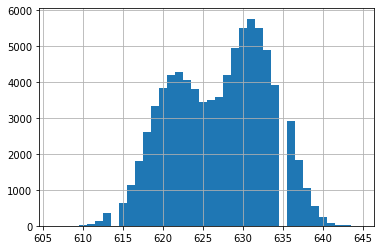

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../../sensor_data/sensor_data_600.txt",delimiter=" ",header=None,names=("data","time","ir","lidar"))
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]),align="left")
plt.show()

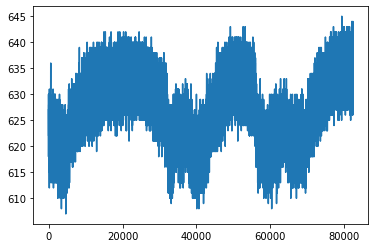

In [2]:
data.lidar.plot()
plt.show()

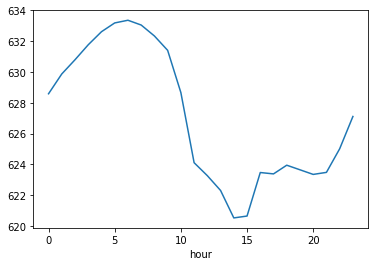

In [3]:
# hourという列を追加.10000で割ることで時だけ残す。
data["hour"]=[e//10000 for e in data.time]
# hourでグループ分けしたデータフレームdを生成
d=data.groupby("hour")
d.lidar.mean().plot()
plt.show()

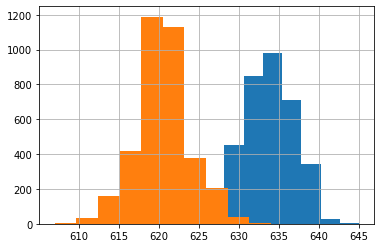

In [4]:
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()
plt.show()

In [5]:
# ここから同時確率P(z,b)を求める

# each_hourは辞書型の変数
# 時間帯を辞書のキーにして時間ごとの頻度のデータフレームが24個入る。
# d.lidar.get_group(i).value_counts().sort_index()は時間iにおけるセンサー値の個数を数え、
# センサー値順に並べてデータフレームを返す。
each_hour={i:d.lidar.get_group(i).value_counts().sort_index() for i in range(24)} # 時間帯ごとにデータフレームを作成
# @note 上記のeach_hourをconcat()で連結すると順番がおかしくなる。対策として、以下のようにconcatではなくデータフレームを作成する。
temp = pd.DataFrame(each_hour)
temp

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,NaN,1.0,1.0,11.0,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,10.0,NaN,NaN,NaN,2.0,6.0,12.0,4.0,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,26.0,NaN,3.0,3.0,5.0,21.0,16.0,2.0,1.0
613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,53.0,2.0,15.0,5.0,18.0,56.0,36.0,9.0,2.0
615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.0,86.0,2.0,17.0,22.0,31.0,81.0,84.0,39.0,4.0
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.0,149.0,18.0,49.0,49.0,84.0,142.0,115.0,49.0,7.0
617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,256.0,241.0,42.0,104.0,76.0,135.0,182.0,189.0,84.0,12.0


In [6]:
# @note tempを使うのでコメントアウト
#concatで連結.
#freqs=pd.concat(each_hour,axis=1)
#freqs

In [7]:
#freqs=freqs.fillna(0)#欠損値（NaN)を0で埋める
freqs=temp.fillna(0)
freqs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,0.0,1.0,1.0,11.0,0.0,0.0,0.0
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,10.0,0.0,0.0,0.0,2.0,6.0,12.0,4.0,0.0
612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,26.0,0.0,3.0,3.0,5.0,21.0,16.0,2.0,1.0
613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,53.0,2.0,15.0,5.0,18.0,56.0,36.0,9.0,2.0
615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,107.0,86.0,2.0,17.0,22.0,31.0,81.0,84.0,39.0,4.0
616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,161.0,149.0,18.0,49.0,49.0,84.0,142.0,115.0,49.0,7.0
617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,256.0,241.0,42.0,104.0,76.0,135.0,182.0,189.0,84.0,12.0


In [8]:
# 同時確率を求める
probs=freqs/len(data)
probs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000036,0.000049,0.000000,0.000000,0.000012,0.000012,0.000134,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000146,0.000122,0.000000,0.000000,0.000000,0.000024,0.000073,0.000146,0.000049,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000219,0.000316,0.000000,0.000036,0.000036,0.000061,0.000255,0.000194,0.000024,0.000012
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000620,0.000644,0.000024,0.000182,0.000061,0.000219,0.000680,0.000437,0.000109,0.000024
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001300,0.001045,0.000024,0.000207,0.000267,0.000377,0.000984,0.001021,0.000474,0.000049
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001956,0.001810,0.000219,0.000595,0.000595,0.001021,0.001725,0.001397,0.000595,0.000085
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003111,0.002928,0.000510,0.001264,0.000923,0.001640,0.002211,0.002296,0.001021,0.000146


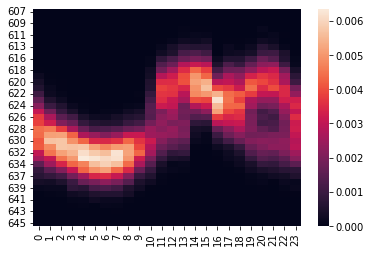

In [9]:
# P(z,t)を可視化してみる
import seaborn as sns

# ヒートマップは色の明るい場所が確率が高いことを示す。
sns.heatmap(probs)
plt.show()

/home/yuki/clone/LNPR_BOOK_CODES/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


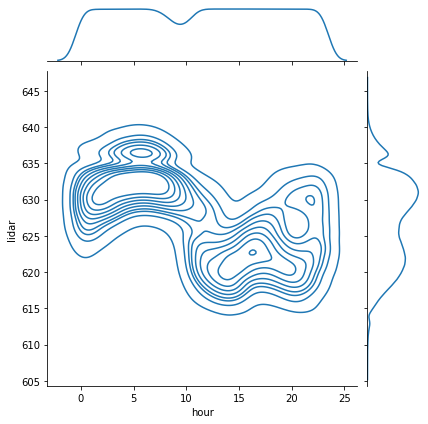

In [10]:
sns.jointplot(data["hour"],data["lidar"],data,kind="kde")
plt.show()

* 上記の図はヒストグラムですが、特に値は入っていないので、確率分布を描いたものと考えてよい。
* この確率分布は同時確率の分布なので、そのまま`同時確率分布`あるいは`結合確率分布`と呼ばれる。
* 上側と右側にP(z,t)をセンサー値、時間帯ごとに合計したグラフが示されている。それぞれP(z),P(t)として
  * P(t)=ΣzP(z,t)
    * 時刻tが0から23のとき、各時刻で得られたセンサー値の確率
  * P(z)=ΣtP(z,t)
    * あるセンサー値がどの時刻でどれだけ得られるかの確率

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.043013,0.042916,0.042879,0.042916,0.042964,0.043037,0.043061,0.043001,0.038712,0.028651,...,0.043183,0.043122,0.043061,0.043122,0.043049,0.043086,0.043159,0.042976,0.043049,0.043037


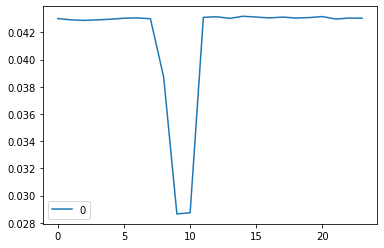

In [11]:
# 具体的にP(t)とP(z)を計算してみる
p_t = pd.DataFrame(probs.sum()) # 各列の合計
p_t.plot()
p_t.transpose()# 紙面の関係で横並びにする

In [12]:
p_t.sum()

0    1.0
dtype: float64

,607,608,609,610,611,612,613,615,616,617,...,636,637,638,639,640,641,642,643,644,645
0,0.000012,0.000049,0.000061,0.000328,0.00068,0.00158,0.004241,0.007752,0.013852,0.022053,...,0.03537,0.02226,0.012819,0.006671,0.002989,0.000996,0.000401,0.000109,0.000024,0.000012


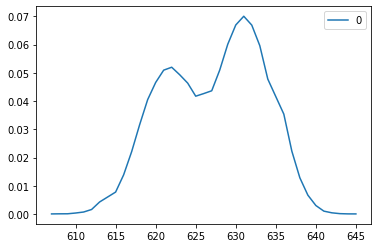

In [13]:
p_z=pd.DataFrame(probs.transpose().sum())# 行と列を転置して各列を合計
p_z.plot()
p_z.transpose()

In [14]:
p_z.sum()

0    1.0
dtype: float64

In [15]:
# 同時確率P(z,t)を条件付き確率P(x|t)に変換
# 列（時間）ごとにP(t)で割るとP(x|t)となる
cond_z_t = probs/p_t[0]
cond_z_t

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000283,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000283,0.000282,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000844,0.001127,0.000000,0.000000,0.000282,0.000282,0.003097,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003376,0.002818,0.000000,0.000000,0.000000,0.000564,0.001689,0.003393,0.001129,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005065,0.007326,0.000000,0.000845,0.000847,0.001410,0.005912,0.004524,0.000564,0.000282
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014350,0.014934,0.000564,0.004227,0.001411,0.005076,0.015766,0.010178,0.002540,0.000565
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030107,0.024232,0.000564,0.004790,0.006209,0.008742,0.022804,0.023749,0.011008,0.001129
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045301,0.041984,0.005079,0.013807,0.013830,0.023689,0.039977,0.032513,0.013830,0.001976
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072032,0.067906,0.011851,0.029304,0.021451,0.038071,0.051239,0.053435,0.023709,0.003388


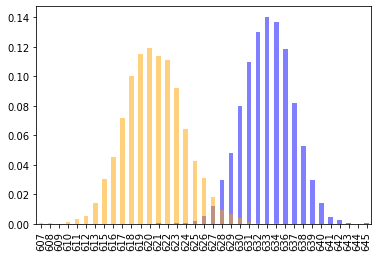

In [16]:
# 確率分布P(z|t=6)とP(z|t=14)を出力
(cond_z_t[6]).plot.bar(color="blue",alpha=0.5)
(cond_z_t[14]).plot.bar(color="orange",alpha=0.5)
plt.show()